In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
userdata=pd.read_csv("takehome_users.csv", encoding='ISO-8859-1')
userengage=pd.read_csv("takehome_user_engagement.csv")
userengage

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [13]:
merge_data = pd.merge(userdata, userengage, left_on='object_id' , right_on='user_id')
merge_data

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013-09-06 06:14:15,11996,1
207913,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,2013-01-15 18:28:37,11997,1
207914,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014-04-27 12:45:16,11998,1
207915,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,2012-06-02 11:55:59,11999,1


In [22]:
merge_data['Date'] = merge_data['time_stamp'].astype('datetime64')
merge_data['Week'] = merge_data['Date'].dt.isocalendar().week
merge_data['Year'] = merge_data['Date'].dt.isocalendar().year
merge_data['Month'] = merge_data['Date'].dt.month

grouped_data=merge_data.groupby(['user_id','org_id','year' ,'month', 'week' , 'visited']).size()
dff = grouped_data.to_frame(name = 'weekly_visited').reset_index()
print(dff.info)

<bound method DataFrame.info of        user_id  org_id  year  month  week  visited  weekly_visited
0            1      11  2014      4    17        1               1
1            2       1  2013     11    46        1               1
2            2       1  2013     11    48        1               1
3            2       1  2013     12    50        1               1
4            2       1  2013     12    52        1               1
...        ...     ...   ...    ...   ...      ...             ...
75928    11996      89  2013      9    36        1               1
75929    11997     200  2013      1     3        1               1
75930    11998      83  2014      4    17        1               1
75931    11999       6  2012      6    22        1               1
75932    12000       0  2014      1     4        1               1

[75933 rows x 7 columns]>


In [23]:
df1 = dff[dff['weekly_visited'] >= 3]
df1

,user_id,org_id,year,month,week,visited,weekly_visited
6,2,1,2014,2,6,1,3
30,10,318,2013,4,15,1,3
32,10,318,2013,4,17,1,3
34,10,318,2013,5,18,1,3
35,10,318,2013,5,19,1,5
...,...,...,...,...,...,...,...
75886,11975,31,2014,5,21,1,3
75905,11988,114,2014,3,12,1,4
75912,11988,114,2014,4,18,1,3
75915,11988,114,2014,5,20,1,3


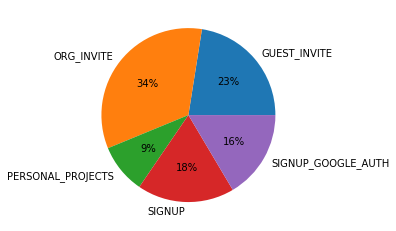

In [26]:
count= merge_data.groupby(['creation_source']).size()
count = count.to_frame(name = 'size').reset_index()
y = np.array(count['size'])
label = np.array(count['creation_source'])

plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

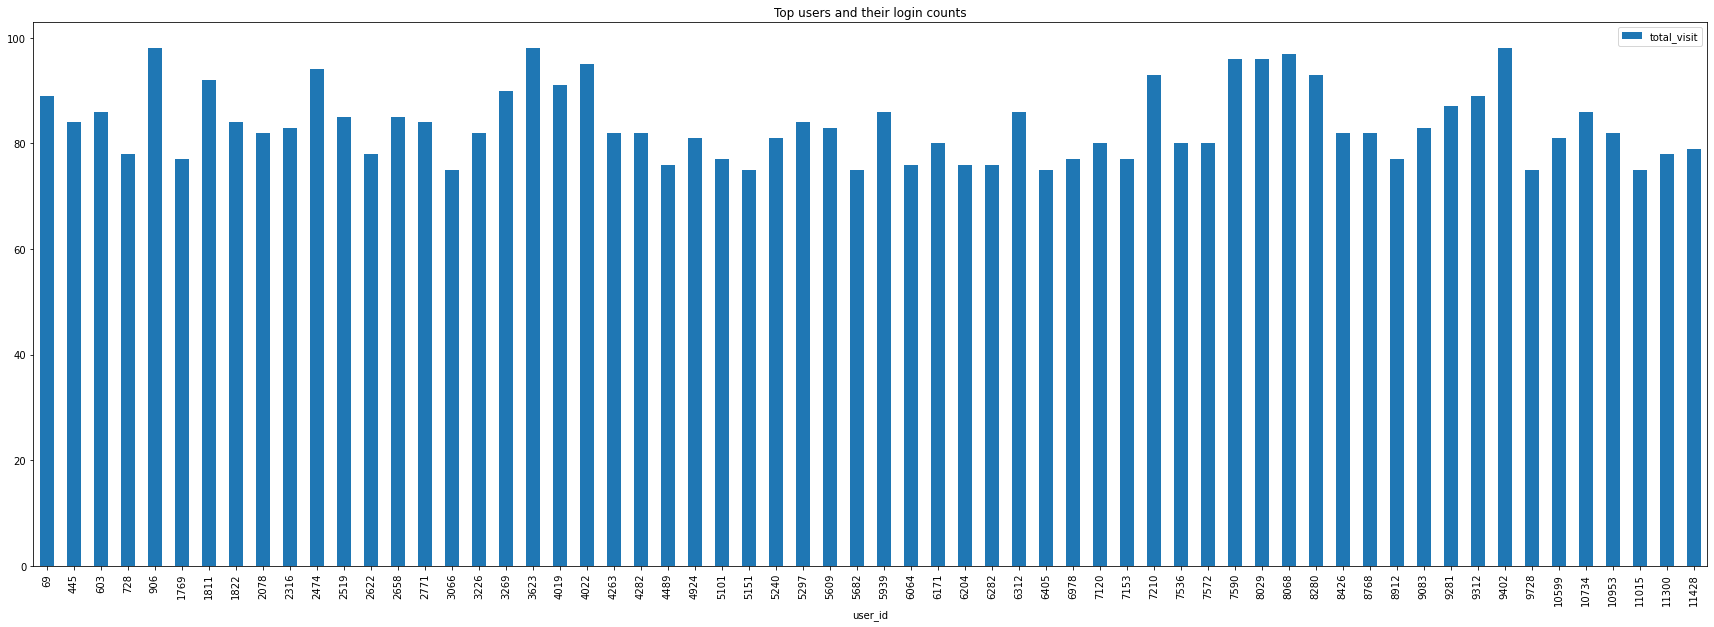

In [27]:
#Grouping both columns and creating df2
df2 = df1
df2 = df2.groupby(['user_id','org_id']).size()
df2 = df2.to_frame(name = 'total_visit').reset_index()

#Filtering top 25% of users and their login counts
top= df2[df2['total_visit'] >=75]

#Bar chart which shows Top users and their login counts
top.plot.bar(x='user_id', y='total_visit', figsize=(30,10), title="Top users and their login counts")
plt.show()

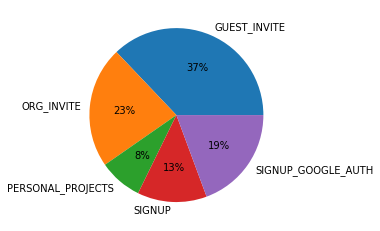

In [28]:
#Merging the actual data with the top user's data 
top_users= pd.merge(userdata1,top,  left_on='object_id' , right_on='user_id')

cnt= top_users.groupby(['creation_source']).size()
cnt=cnt.to_frame(name='size').reset_index()

#Pie chart which shows the user adoption in top users
y=np.array(cnt['size'])
label=np.array(cnt['creation_source'])

plt.pie(y, labels= label, autopct='%1.0f%%')
plt.show()